In [4]:
import numpy as np

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
    return dict


In [34]:
test = unpickle('/content/drive/MyDrive/AI Lab/cifar-10-batches-py/data_batch_1')
print(type(test))

<class 'dict'>


In [13]:
test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [15]:
for item in test:
  print(item, type(test[item]))

b'batch_label' <class 'bytes'>
b'labels' <class 'list'>
b'data' <class 'numpy.ndarray'>
b'filenames' <class 'list'>


In [17]:
set(test[b'labels'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [19]:
test[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [47]:
np.shape(test[b'data'])

(10000, 3072)

In [23]:
meta = unpickle('/content/drive/MyDrive/AI Lab/cifar-10-batches-py/batches.meta')

In [25]:
type(meta)

dict

In [26]:
meta.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [27]:
meta[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd /content/drive/MyDrive/AI Lab/cifar-10-batches-py
!pwd

/content/drive/MyDrive/AI Lab/cifar-10-batches-py
/content/drive/MyDrive/AI Lab/cifar-10-batches-py


In [37]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
    return dict

In [39]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')


In [40]:
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'],bat4[b'data'],
bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'],bat4[b'labels'],
bat5[b'labels']])

In [44]:
np.shape(bat1[b'data'])

(10000, 3072)

In [48]:
np.shape(data)

(50000, 3072)

In [49]:
np.shape(labels)

(50000,)

(50000, 32, 32, 3)

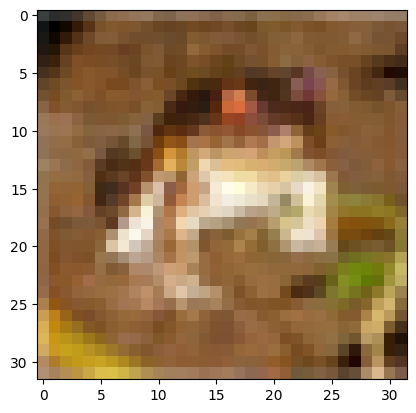

In [51]:
import matplotlib.pyplot as plt
img = data.reshape(50000,3,32,32)
img = img.transpose(0,2,3,1)
plt.imshow(img[0].astype('uint8'))
np.shape(img)

In [52]:
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

In [54]:
%cd /content/drive/MyDrive/AI Lab/
!pwd

/content/drive/MyDrive/AI Lab
/content/drive/MyDrive/AI Lab


In [55]:
from knn import NearestNeighbor
NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in)


In [56]:
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)


[8 8 1 0 4 2 2 5 0 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 20.0


In [57]:
train_data = data.astype("float")
train_label = labels
test_data = bat_test[b'data'].astype("float")
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])


numpy.uint8

In [58]:
from knn import NearestNeighbor
NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in)

In [59]:
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)


[4 8 1 0 4 6 4 2 4 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 30.0


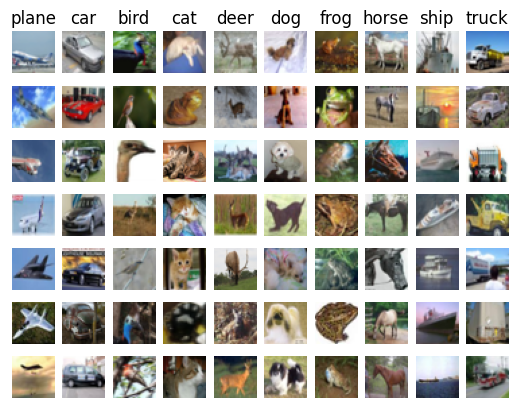

In [60]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
   idxs = np.flatnonzero(labels == y)
   idxs = np.random.choice(idxs, samples_per_class, replace=False)
   for i, idx in enumerate(idxs):
      plt_idx = i * num_classes + y + 1
      plt.subplot(samples_per_class, num_classes, plt_idx)
      plt.imshow(img[idx].astype('uint8'))
      plt.axis('off')
      if i == 0:
        plt.title(cls)
plt.show()